In [1]:
# set workspace
WhoIsWorking = "RT"
WorkLocation = "School"

if WhoIsWorking == "RT":
    if WorkLocation == "Home":
        folder_path = r'C:\Users\rentr\Desktop\ENGO\DataMining\ENGO645_TermProject_Data'
    elif WorkLocation == "School":
        folder_path = r'D:\ENGO645_TermProject_Data'
elif WhoIsWorking == "AA":
    folder_path = ''
elif WhoIsWorking == "IA":
    folder_path = r'C:\Users\afoam\assignments\ENGO645_TorontoCrimeAnalysis'
elif WhoIsWorking == "AI":
    folder_path = r'C:\Adewale_Directory\Capacity_Building\MGIS\Lecture_Note\WINTER2024\ENGO645\Course_Project\Project_Data'

print(folder_path)

D:\ENGO645_TermProject_Data


In [2]:
import os
import geopandas as gpd
import pandas as pd

# Load the MCI file
MCI_file = os.path.join(folder_path, "MCI_Cleaned.csv")
MCI_data = pd.read_csv(MCI_file)

In [3]:
MCI_data.head()

,OCC_YEAR,OCC_MONTH,SEASON,OCC_DAY,OCC_DOY,OCC_DOW,DOW_WorkvsEnd,OCC_HOUR,TIMECategory,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,DATE_TIME_LINK,TEMP,TEMPCategory
0,2023,January,Winter,1,1,Sunday,Weekend,2,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery With Weapon,Robbery,Corso Italia-Davenport,-79.450529,43.676205,2023/1/1 2,4.7,Mild
1,2023,January,Winter,1,1,Sunday,Weekend,1,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Other,Robbery,St Lawrence-East Bayfront-The Islands,-79.368457,43.648776,2023/1/1 1,4.5,Mild
2,2023,January,Winter,1,1,Sunday,Weekend,9,Morning,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Morningside Heights,-79.202638,43.815274,2023/1/1 9,4.4,Mild
3,2023,January,Winter,1,1,Sunday,Weekend,3,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault With Weapon,Assault,New Toronto,-79.517052,43.600915,2023/1/1 3,4.9,Mild
4,2023,January,Winter,1,1,Sunday,Weekend,21,Evening,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,Victoria Village,-79.300571,43.719703,2023/1/1 21,4.1,Mild


In [4]:
# Extract unique years
unique_years = MCI_data['OCC_YEAR'].unique()

# Print unique years
print("Unique years from OCC_YEAR field:")
print(unique_years)

Unique years from OCC_YEAR field:
[2023 2022 2021 2020 2019 2018 2017 2016 2015 2014]


# Number of Crime Incidents 2014 - 2023

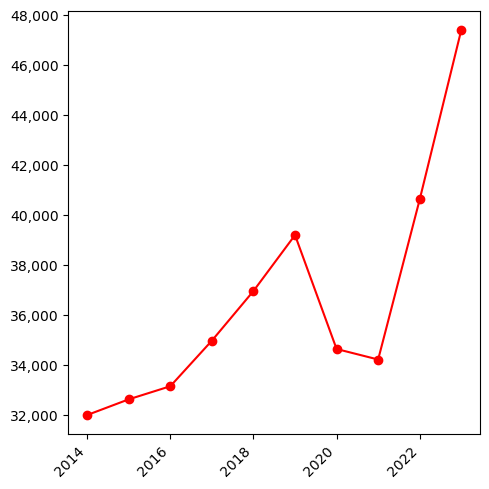

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

# Group by year and count occurrences
grouped_data_YEAR = MCI_data.groupby('OCC_YEAR').size()

# Plot line chart
plt.figure(figsize=(5, 5))  # Adjusting figure size for better visualization
plt.plot(grouped_data_YEAR.index, grouped_data_YEAR, marker='o', color='red', linestyle='-')
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Format y-axis labels with thousand separators
plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.xticks(rotation=45, ha='right')  # Setting x-axis ticks and labels

# Label each point with its respective count (adjusting position above the points)
#for x, y in zip(grouped_data_YEAR.index, grouped_data_YEAR):
#    plt.text(x, y + 600, '%d' % y, ha='center', va='bottom')  # Adjusting y-coordinate to move label above point further

plt.tight_layout()
plt.show()


In [6]:
#count of incidents per year
grouped_data_YEAR

OCC_YEAR
2014    31986
2015    32614
2016    33138
2017    34962
2018    36949
2019    39188
2020    34628
2021    34207
2022    40615
2023    47399
dtype: int64

# Top 10 neighbourhood with highest count of crime

In [7]:
neighbourhood_counts = MCI_data['NEIGHBOURHOOD_158'].value_counts().reset_index()
neighbourhood_counts.columns = ['NEIGHBOURHOOD_158', 'Count']

neighbourhood_counts

,NEIGHBOURHOOD_158,Count
0,West Humber-Clairville,10309
1,Moss Park,8621
2,Downtown Yonge East,7762
3,Yonge-Bay Corridor,7294
4,York University Heights,7237
...,...,...
154,Maple Leaf,734
155,Guildwood,680
156,Woodbine-Lumsden,649
157,Lambton Baby Point,585


C:\Users\rdtruong\AppData\Local\Temp\ipykernel_48656\4043841148.py:15: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('Reds')  # Choose colormap


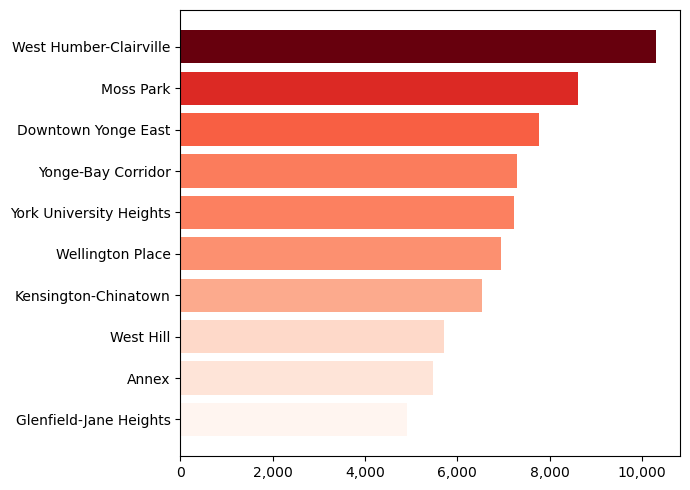

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.cm as cm
from matplotlib.ticker import FuncFormatter

# Sorting the dataframe by count in descending order and flipping it
top_10_neighbourhoods = neighbourhood_counts.sort_values(by='Count', ascending=False).head(10)
top_10_neighbourhoods = top_10_neighbourhoods.iloc[::-1]

# Check if there are valid top 10 neighbourhoods
if top_10_neighbourhoods.empty:
    print("No data available for plotting.")
else:
    # Define colormap and normalization
    cmap = plt.cm.get_cmap('Reds')  # Choose colormap
    norm = mcolors.Normalize(vmin=top_10_neighbourhoods['Count'].min(), vmax=top_10_neighbourhoods['Count'].max())  # Normalize counts

    # Plotting
    fig, ax = plt.subplots(figsize=(7, 5))

    # Plot top 10 neighborhoods with gradient colors
    bars = ax.barh(y=top_10_neighbourhoods['NEIGHBOURHOOD_158'], width=top_10_neighbourhoods['Count'], color=cmap(norm(top_10_neighbourhoods['Count'])))

    # Format x-axis labels with thousand separators
    ax.xaxis.set_major_formatter(FuncFormatter(lambda x, _: '{:,.0f}'.format(x)))

    plt.tight_layout()
    plt.show()

C:\Users\rdtruong\AppData\Local\Temp\ipykernel_48656\2842109411.py:8: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap('Reds')  # Choose colormap


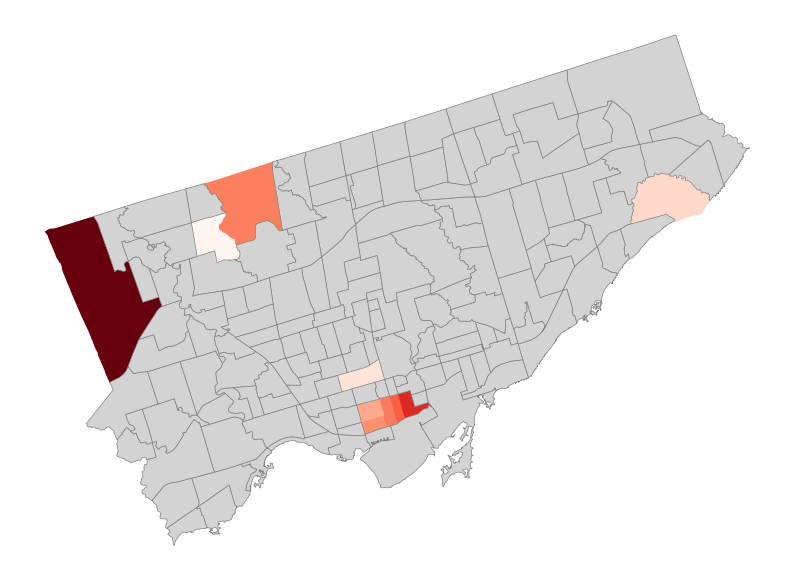

In [9]:
import os
import geopandas as gpd

# Load the shapefile
gdf = gpd.read_file(os.path.join(folder_path, 'Neighbourhoods.shp'))

# Define colormap and normalization
cmap = cm.get_cmap('Reds')  # Choose colormap
norm = mcolors.Normalize(vmin=top_10_neighbourhoods['Count'].min(), vmax=top_10_neighbourhoods['Count'].max())  # Normalize counts

# Plot the map
fig, ax = plt.subplots(figsize=(10, 10))

# Plot top 10 neighborhoods with gradient colors
for _, row in top_10_neighbourhoods.iterrows():
    color = cmap(norm(row['Count']))  # Map count to color
    gdf[gdf['AREA_NA7'] == row['NEIGHBOURHOOD_158']].plot(ax=ax, color=color, edgecolor=color, linewidth=1)

# Plot other neighborhoods
gdf[~gdf['AREA_NA7'].isin(top_10_neighbourhoods['NEIGHBOURHOOD_158'])].plot(ax=ax, color='lightgrey', edgecolor='grey', linewidth=0.5)

# Create colorbar
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])

# Set plot title
ax.set_title('')

# Remove axes
ax.set_axis_off()

# Display the plot
plt.show()


# Crime by Month /DOW - not useful

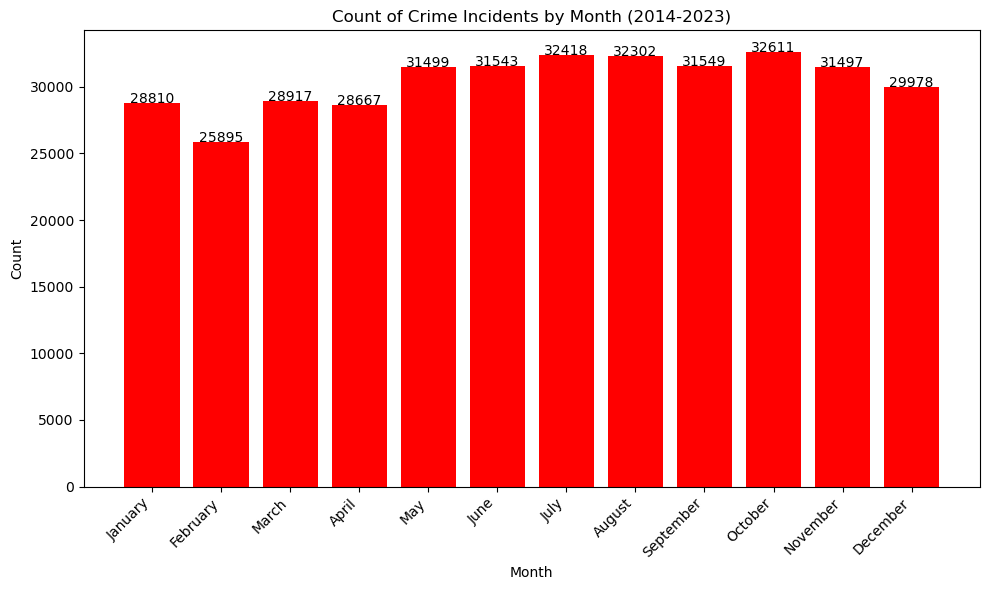

In [10]:
# Group by month and count occurrences
grouped_data_MONTH = MCI_data.groupby('OCC_MONTH').size()

# Define the order of months
months_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Reindex the grouped_data_MONTH Series with months in the desired order
grouped_data_MONTH = grouped_data_MONTH.reindex(months_order, fill_value=0)

# Plot bar chart
plt.figure(figsize=(10, 6))
plt.bar(grouped_data_MONTH.index, grouped_data_MONTH, color='red')
plt.title('Count of Crime Incidents by Month (2014-2023)')
plt.xlabel('Month')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')

# Label each bar with its respective count
for x, y in zip(range(len(grouped_data_MONTH)), grouped_data_MONTH):
    plt.text(x, y + 0.1, '%d' % y, ha='center')

plt.tight_layout()
plt.show()


In [11]:
unique_days_of_week = MCI_data['OCC_DOW'].unique()
print(unique_days_of_week)

['Sunday    ' 'Monday    ' 'Tuesday   ' 'Wednesday ' 'Thursday  '
 'Friday    ' 'Saturday  ']


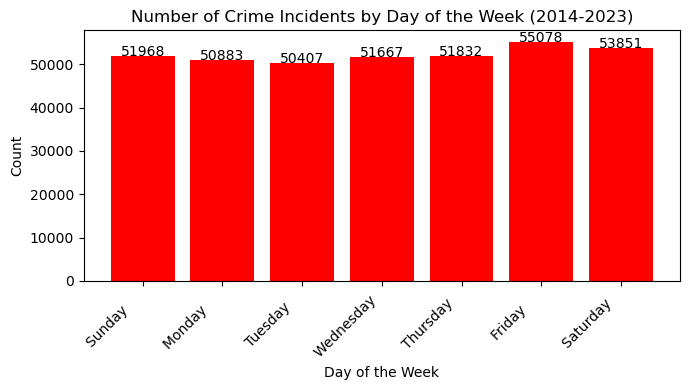

In [12]:
# Group by day of the week and count occurrences
grouped_data_DOW = MCI_data.groupby('OCC_DOW').size()

# Define the order of weekdays
weekdays_order = ['Sunday    ', 'Monday    ', 'Tuesday   ', 'Wednesday ', 'Thursday  ', 'Friday    ', 'Saturday  ']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(7, 4))

# Plot bar chart
ax.bar(weekdays_order, grouped_data_DOW.loc[weekdays_order], color='red')

# Set the title and labels
ax.set_title('Number of Crime Incidents by Day of the Week (2014-2023)')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Count')

# Label each bar with its respective count
for x, y in zip(range(len(weekdays_order)), grouped_data_DOW.loc[weekdays_order]):
    ax.text(x, y + 0.1, '%d' % y, ha='center')

# Adjust x-axis labels rotation
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()


# Number of Crime Incidents by Hour of the Day (2014-2023)

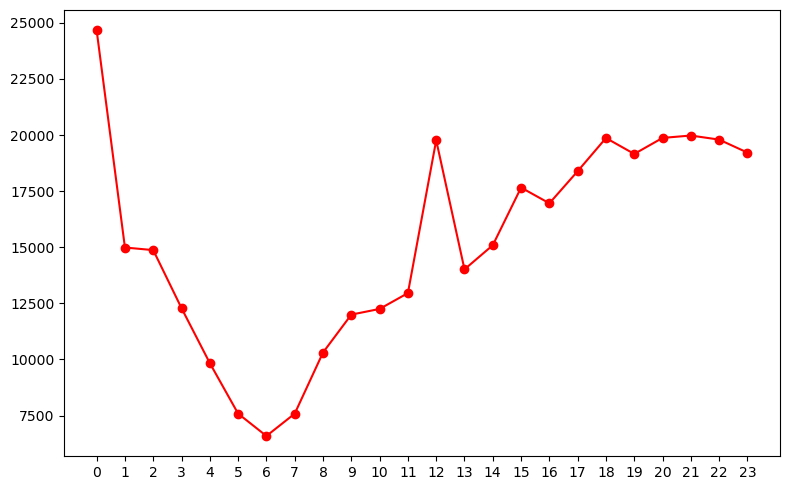

In [19]:
# Group by hour of the day and count occurrences
grouped_data_HOUR = MCI_data.groupby('OCC_HOUR').size()

# Plot line chart
plt.figure(figsize=(8, 5))
plt.plot(grouped_data_HOUR.index, grouped_data_HOUR, marker='o', color='red', linestyle='-')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(24))  # Set x-axis ticks to show all hours in 24-hour format

# Label each point with its respective count
#for x, y in zip(grouped_data_HOUR.index, grouped_data_HOUR):
#    plt.text(x, y + 500, '%d' % y, ha='center', va='bottom')

plt.tight_layout()
plt.show()


# Crime by category

In [16]:
# Group by 'MCI_CATEGORY' and count occurrences
grouped_data_MCI = MCI_data['MCI_CATEGORY'].value_counts()

# Create DataFrame for table
table_data = pd.DataFrame({
    'Percentage': (grouped_data_MCI / grouped_data_MCI.sum() * 100).round(1).astype(str) + '%',
    'Count': grouped_data_MCI
}, index=grouped_data_MCI.index)

# Display the table
print(table_data)

                Percentage   Count
MCI_CATEGORY                      
Assault              52.9%  193434
Break and Enter      19.0%   69547
Auto Theft           15.8%   57712
Robbery               9.0%   32864
Theft Over            3.3%   12129


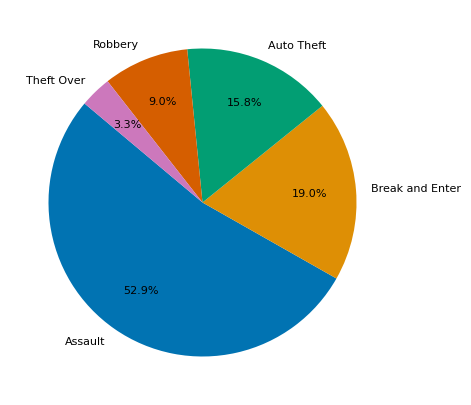

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns 

# Define pastel color palette
colors = sns.color_palette("colorblind")

# Group by 'MCI_CATEGORY' and count occurrences
grouped_data_MCI = MCI_data['MCI_CATEGORY'].value_counts()

# Plotting the pie chart
plt.figure(figsize=(5, 5))
grouped_data_MCI.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=colors, pctdistance=0.70, textprops={'fontsize': 8})
plt.title('')
plt.ylabel('')  # Remove y-label
plt.show()

# Number of Crime Incidents by Time of Day (2014-2023)

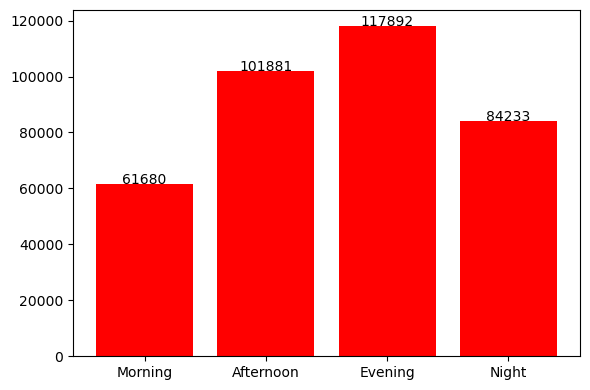

In [44]:
# Group by 'TIMECategory' and count occurrences
grouped_data_TIME = MCI_data.groupby('TIMECategory').size()

# Define the order of time categories
time_categories_order = ['Morning', 'Afternoon', 'Evening', 'Night']

# Plot bar chart
plt.figure(figsize=(6, 4))
plt.bar(time_categories_order, grouped_data_TIME[time_categories_order], color='red')
plt.title('')
plt.xlabel('')
plt.ylabel('')

# Label each bar with its respective count
for x, y in zip(time_categories_order, grouped_data_TIME[time_categories_order]):
    plt.text(x, y + 0.1, '%d' % y, ha='center')

plt.tight_layout()
plt.show()

# Count Incidents by Premises Types (2014-2023

In [45]:
import pandas as pd

# Group by 'PREMISES_TYPE' and count occurrences
grouped_data_PREMISES = MCI_data['PREMISES_TYPE'].value_counts()

# Create DataFrame for table
table_data_PREMISES = pd.DataFrame({
    'Percentage': (grouped_data_PREMISES / grouped_data_PREMISES.sum() * 100).round(1).astype(str) + '%',
    'Count': grouped_data_PREMISES
}, index=grouped_data_PREMISES.index)

# Display the table
print(table_data_PREMISES)

              Percentage  Count
PREMISES_TYPE                  
Outside            26.8%  97987
Apartment          23.6%  86285
Commercial         20.0%  72963
House              18.1%  66355
Other               6.0%  21877
Transit             3.0%  10937
Educational         2.5%   9282


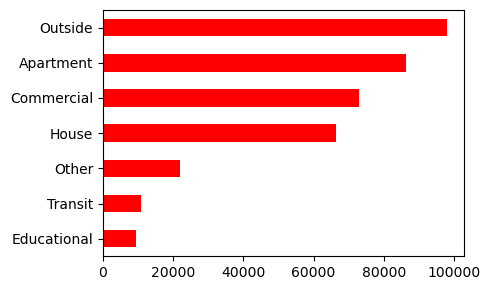

In [51]:
# Sort the grouped_data_PREMISES Series in descending order
grouped_data_PREMISES_sorted = grouped_data_PREMISES.sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(5, 3))
grouped_data_PREMISES_sorted.plot(kind='barh', color='red')
plt.title('')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

In [180]:
# Create a pivot table to get counts for each combination of MCI_CATEGORY and PREMISES_TYPE
pivot_table = MCI_data.pivot_table(index='MCI_CATEGORY', columns='PREMISES_TYPE', aggfunc='size', fill_value=0)

# Display the pivot table
pivot_table

PREMISES_TYPE,Apartment,Commercial,Educational,House,Other,Outside,Transit
MCI_CATEGORY,,,,,,,
Assault,61190,30278,7016,23332,14554,47484,9580
Auto Theft,1619,5102,67,18616,1738,30398,172
Break and Enter,18548,24606,1143,21474,3647,44,85
Robbery,2849,8851,920,1043,1250,16908,1043
Theft Over,2079,4126,136,1890,688,3153,57


In [ ]:
# Create a pivot table to get counts for each combination of MCI_CATEGORY and PREMISES_TYPE
pivot_table = MCI_data.pivot_table(index='OFFENCE', columns='LOCATION_TYPE', aggfunc='size', fill_value=0)

# Display the pivot table
pivot_table

In [ ]:
# Create a pivot table to get counts for each combination of MCI_CATEGORY and PREMISES_TYPE
pivot_table = MCI_data.pivot_table(index='OFFENCE', columns='LOCATION_TYPE', aggfunc='size', fill_value=0)

# Display the pivot table
pivot_table

# Temperature 

In [77]:
# Get unique TEMPCategories
unique_temp_categories = MCI_data['TEMPCategory'].unique()

# Print the unique TEMPCategories
print(unique_temp_categories)

['Mild' 'Cool' 'Chilly' 'Cold' 'Very Cold' 'Warm' 'Hot' 'Very Hot' nan]


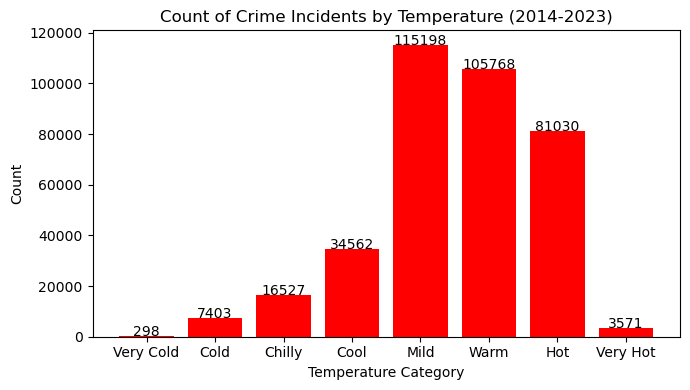

In [79]:
# Group by 'TEMPCategory' and count occurrences
grouped_data_TEMP = MCI_data.groupby('TEMPCategory').size()

# Define the order of temperature categories
temp_categories_order = ['Very Cold', 'Cold', 'Chilly','Cool', 'Mild', 'Warm', 'Hot', 'Very Hot']

# Plot bar chart
plt.figure(figsize=(7, 4))
plt.bar(temp_categories_order, grouped_data_TEMP[temp_categories_order], color='red')
plt.title('Count of Crime Incidents by Temperature (2014-2023)')
plt.xlabel('Temperature Category')
plt.ylabel('Count')

# Label each bar with its respective count
for x, y in zip(temp_categories_order, grouped_data_TEMP[temp_categories_order]):
    plt.text(x, y + 0.1, '%d' % y, ha='center')

plt.tight_layout()
plt.show()

# Neighbourhood

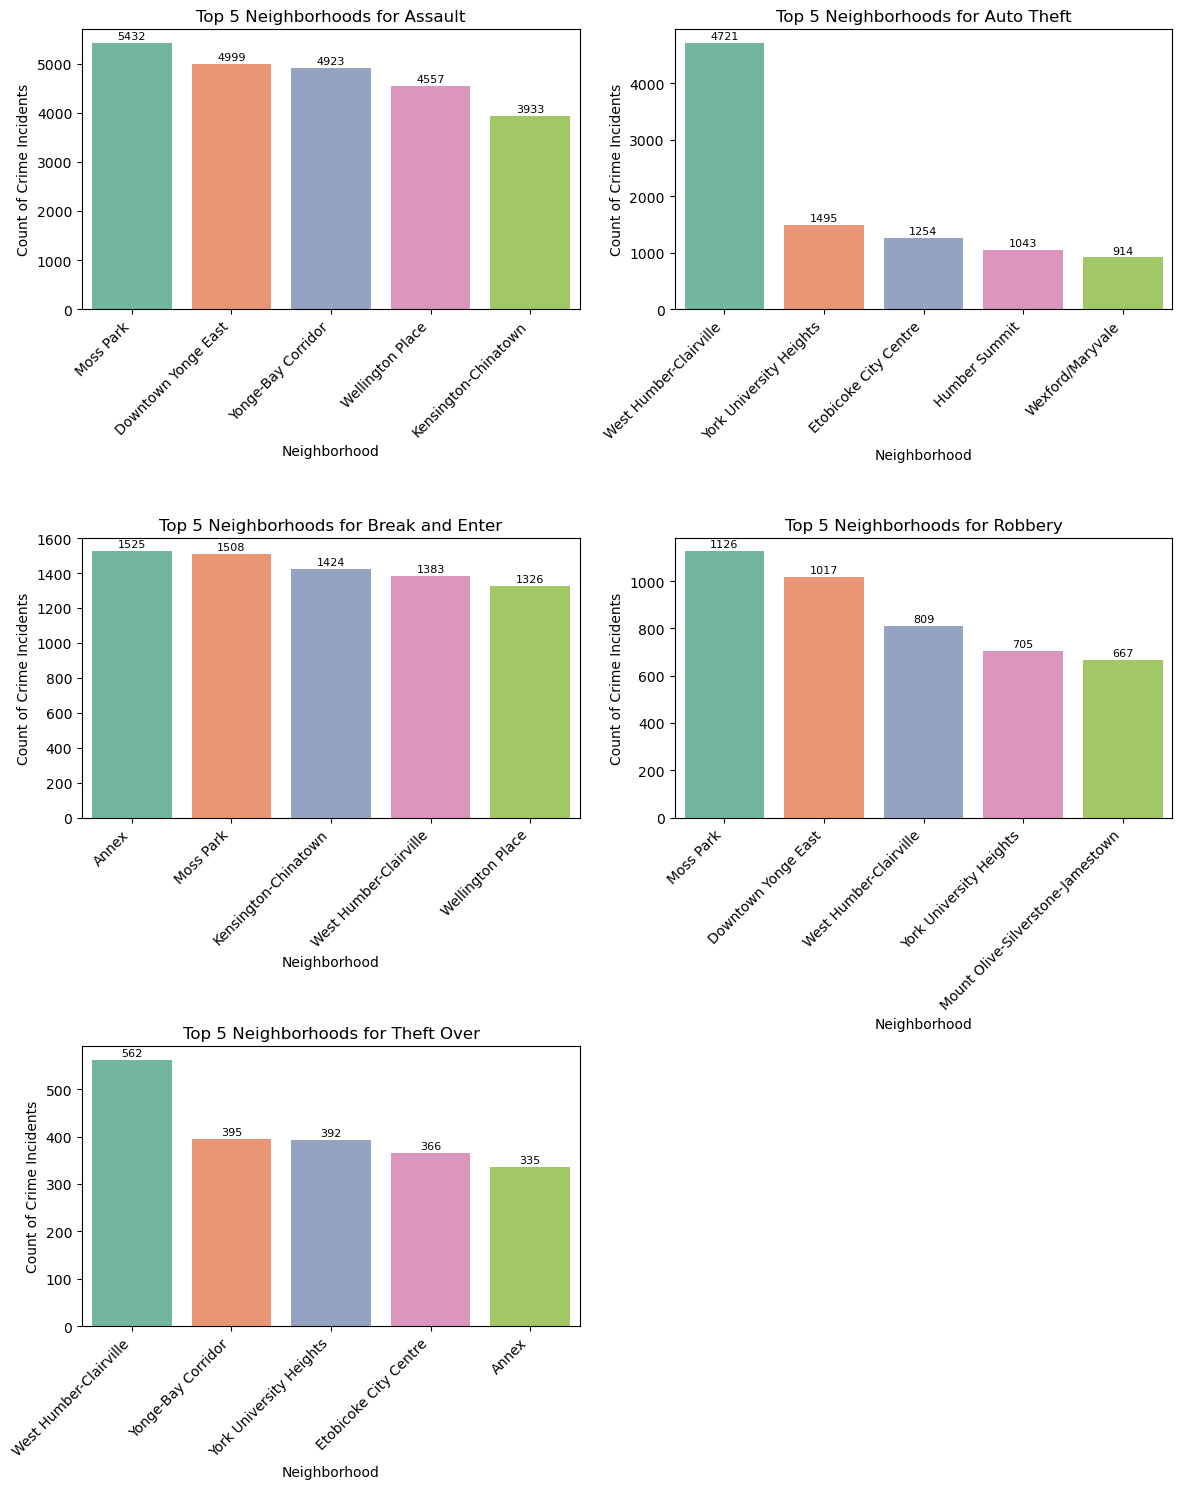

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter the data for relevant columns
crime_data = MCI_data[['NEIGHBOURHOOD_158', 'MCI_CATEGORY']]

# Count the occurrences of each combination of neighbourhood and crime type
crime_counts = crime_data.groupby(['NEIGHBOURHOOD_158', 'MCI_CATEGORY']).size().reset_index(name='COUNT')

# Get the top 5 neighbourhoods for each crime type
top_neighbourhoods = crime_counts.groupby('MCI_CATEGORY').apply(lambda x: x.nlargest(5, 'COUNT')).reset_index(drop=True)

# Determine the number of crime categories
num_categories = len(top_neighbourhoods['MCI_CATEGORY'].unique())

# Calculate the number of rows and columns for subplots
num_rows = (num_categories + 1) // 2  # Add 1 to round up in case of odd number of categories
num_cols = 2

# Create subplots with two rows
fig, axs = plt.subplots(num_rows, num_cols, figsize=(12, 5*num_rows))

# Flatten the axs array if it's not already flat
axs = axs.flatten()

# Plot only the top 5 neighbourhoods for each crime type
for i, (crime_type, data) in enumerate(top_neighbourhoods.groupby('MCI_CATEGORY')):
    ax = axs[i]
    sns.barplot(data=data, x='NEIGHBOURHOOD_158', y='COUNT', palette='Set2', ax=ax)
    ax.set_title(f'Top 5 Neighbourhoods for {crime_type}')
    ax.set_xlabel('Neighbourhood')
    ax.set_ylabel('Count of Crime Incidents')
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

    # Add labels to each bar
    for p in ax.patches:
        ax.annotate(f'{int(p.get_height())}',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', fontsize=8, color='black', xytext=(0, 5),
                    textcoords='offset points')

# Hide empty subplots if there are an odd number of categories
if num_categories % 2 != 0:
    axs[-1].axis('off')

plt.tight_layout()
plt.show()

In [132]:
# Load the Neighbourhood file
Neighbourhood_file = os.path.join(folder_path, "Neighbourhood_Cleaned.csv")
Neighbourhood_data = pd.read_csv(Neighbourhood_file)

In [133]:
Neighbourhood_data.head()

,geometry,NeighbourhoodName,Poles_Count,POI_Count,TCamera_Count,TotalPopulation,MedianTotalIncome,AverageTotalIncome,BuildingCoveragePERCENTAGE,ParksOSNAPERCENTAGE,BuiltUpPERCENTAGE,AveragePrice
0,"POLYGON ((-79.3863510515018 43.6978312650188, ...",South Eglinton-Davisville,649,1185,2,22735,52400,69000,29.087555,6.375824,93.624176,1035636
1,"POLYGON ((-79.3974366551459 43.7069299169967, ...",North Toronto,286,851,2,15885,46000,58100,31.403497,1.133288,98.866712,1035636
2,"POLYGON ((-79.4341131654386 43.660145276359, -...",Dovercourt Village,1170,534,1,12380,38000,55850,33.231409,7.875048,92.124952,1266076
3,"POLYGON ((-79.4387000029275 43.6676608052133, ...",Junction-Wallace Emerson,1663,876,1,23180,41200,54350,33.167140,6.821523,93.178477,1266076
4,"POLYGON ((-79.38403992713209 43.6449650943324,...",Yonge-Bay Corridor,1139,20281,12,12645,44000,68200,48.028587,6.382056,93.617944,880955


In [147]:
from tabulate import tabulate

# Columns to display
columns_to_display = ['Poles_Count', 'POI_Count', 'TCamera_Count', 
                      'TotalPopulation', 'MedianTotalIncome', 
                      'AverageTotalIncome', 'AveragePrice']

# Compute the range (min to max) for each column with thousand separator
range_data = {
    'Column': [],
    'Min': [],
    'Max': []
}

for column in columns_to_display:
    min_value = '{:,.0f}'.format(Neighbourhood_data[column].min())
    max_value = '{:,.0f}'.format(Neighbourhood_data[column].max())
    range_data['Column'].append(column)
    range_data['Min'].append(min_value)
    range_data['Max'].append(max_value)

# Print the range data as a table
print(tabulate(range_data, headers='keys', tablefmt='pretty'))


+--------------------+---------+-----------+
|       Column       |   Min   |    Max    |
+--------------------+---------+-----------+
|    Poles_Count     |   286   |   7,704   |
|     POI_Count      |   121   |  20,281   |
|   TCamera_Count    |    1    |    20     |
|  TotalPopulation   |  6,260  |  33,300   |
| MedianTotalIncome  | 28,400  |  74,500   |
| AverageTotalIncome | 33,720  |  237,600  |
|    AveragePrice    | 810,703 | 3,216,961 |
+--------------------+---------+-----------+


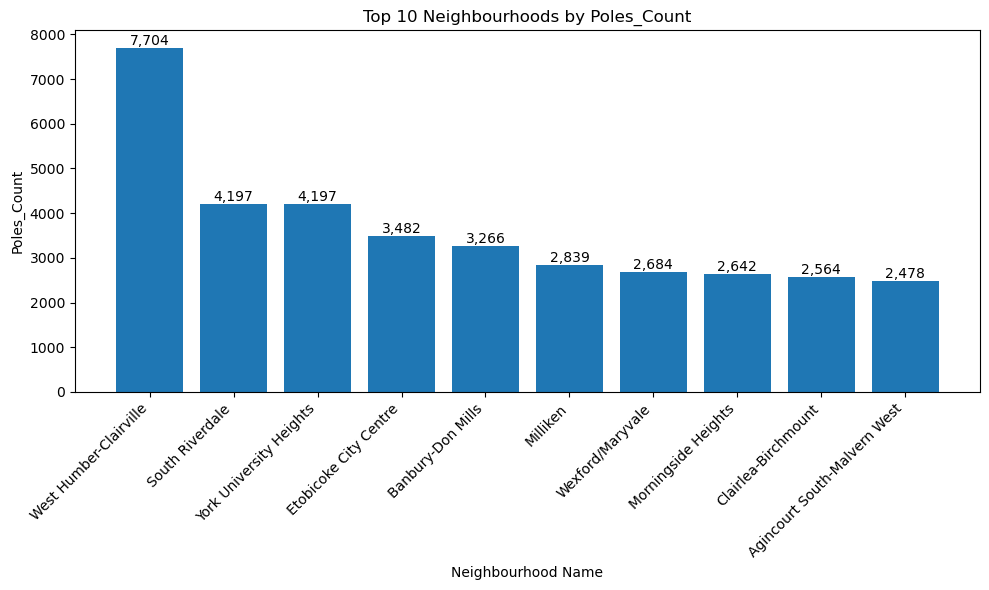

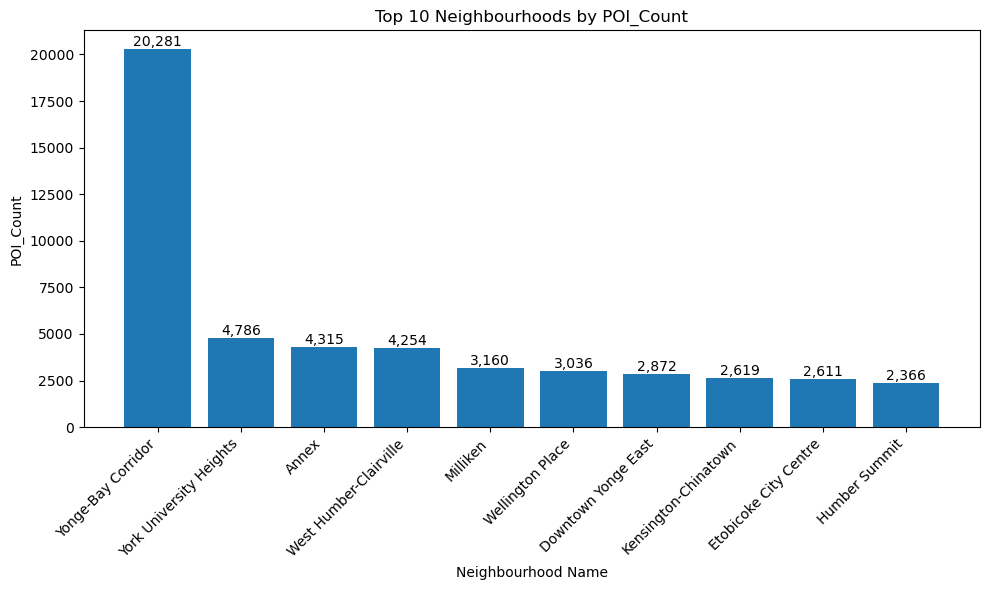

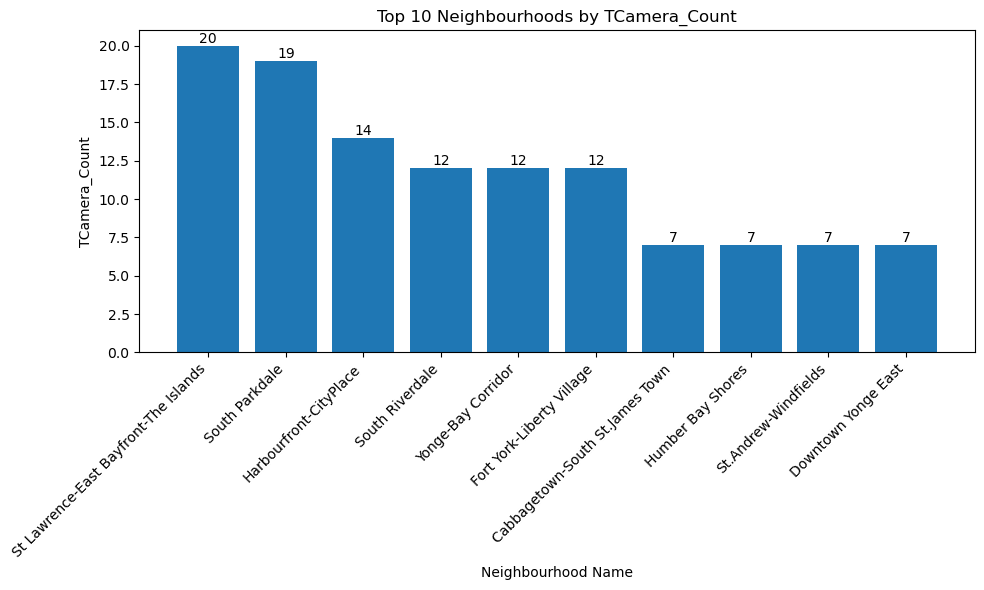

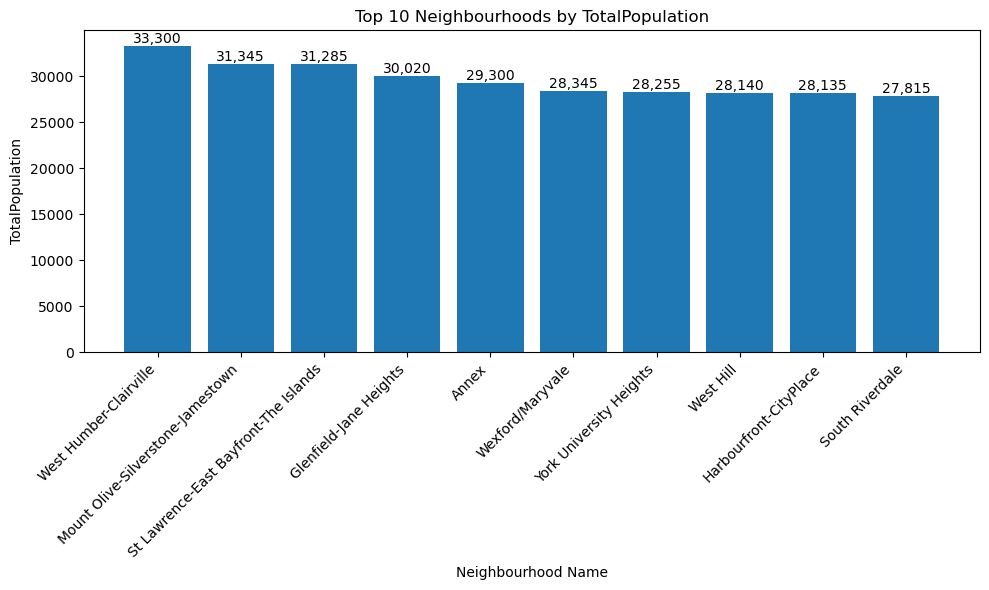

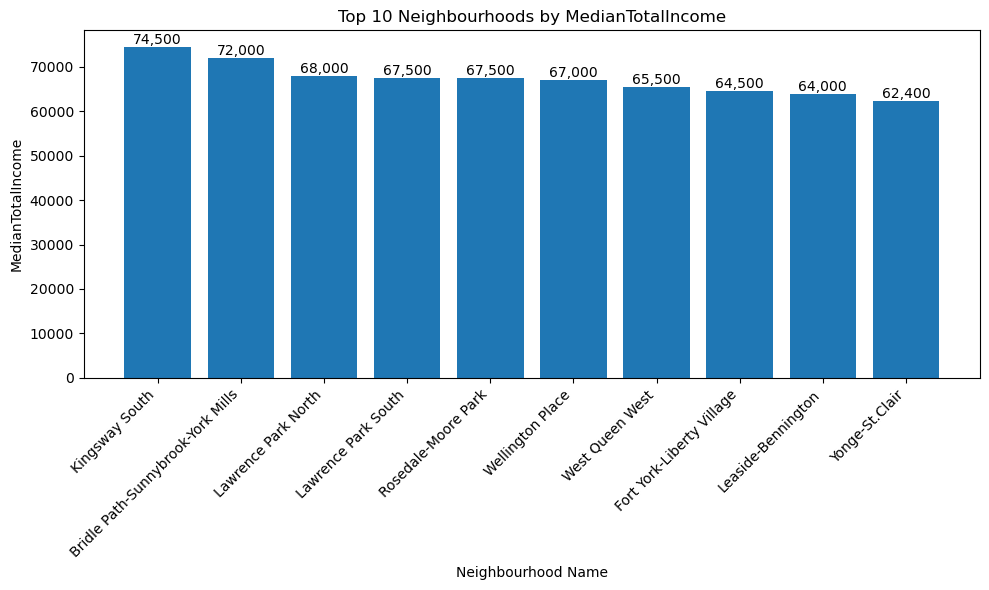

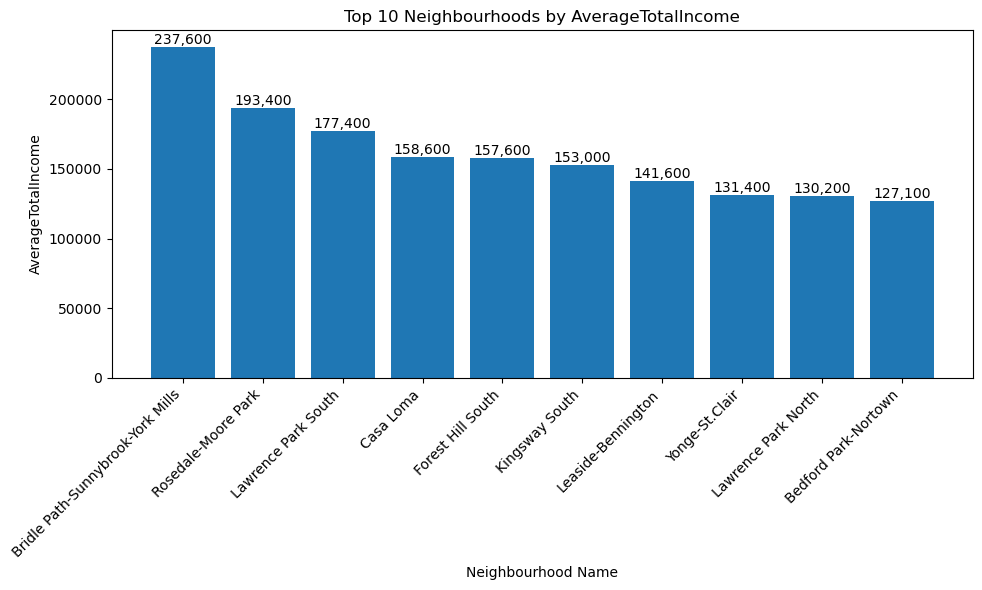

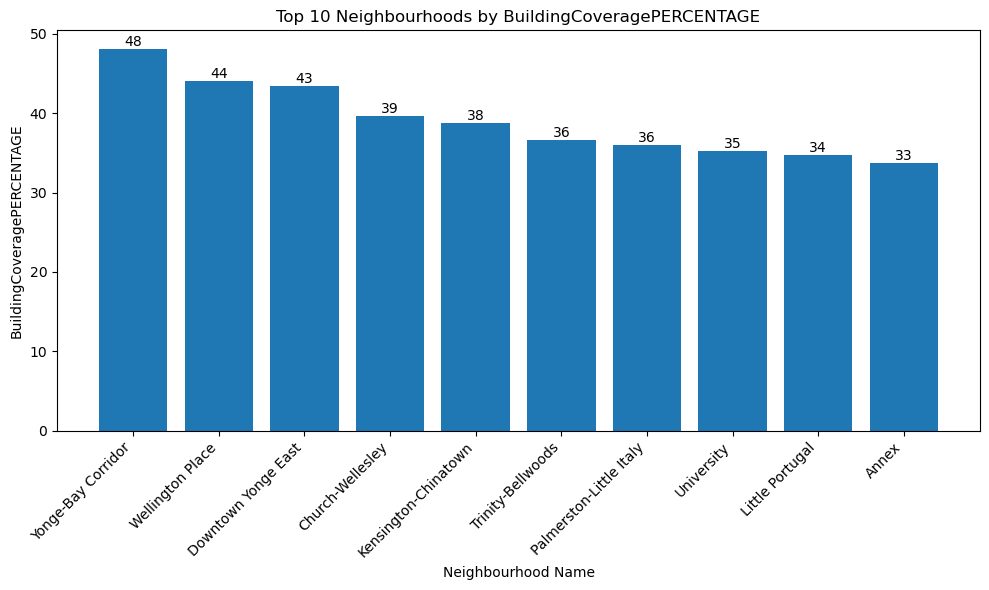

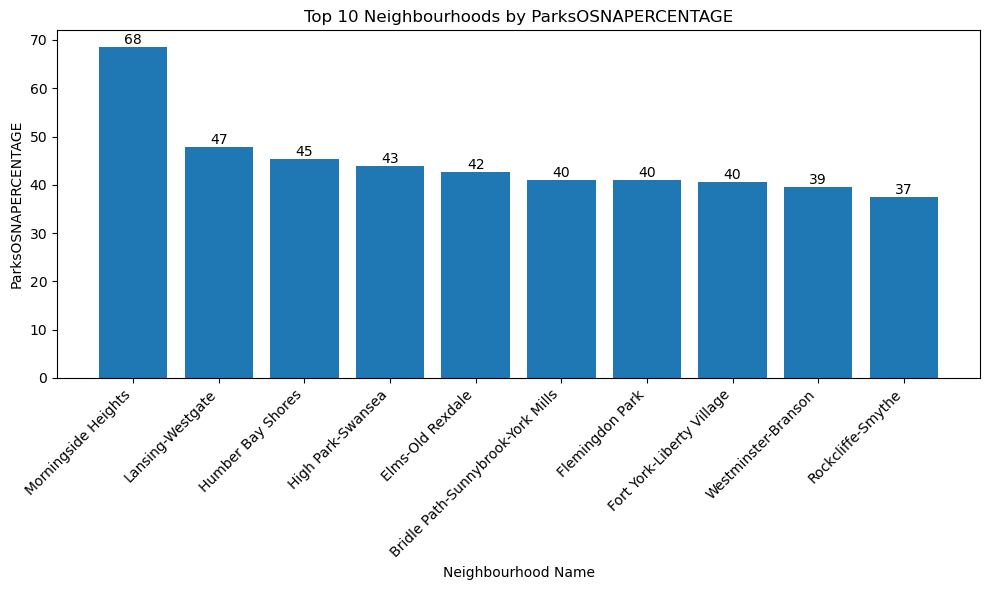

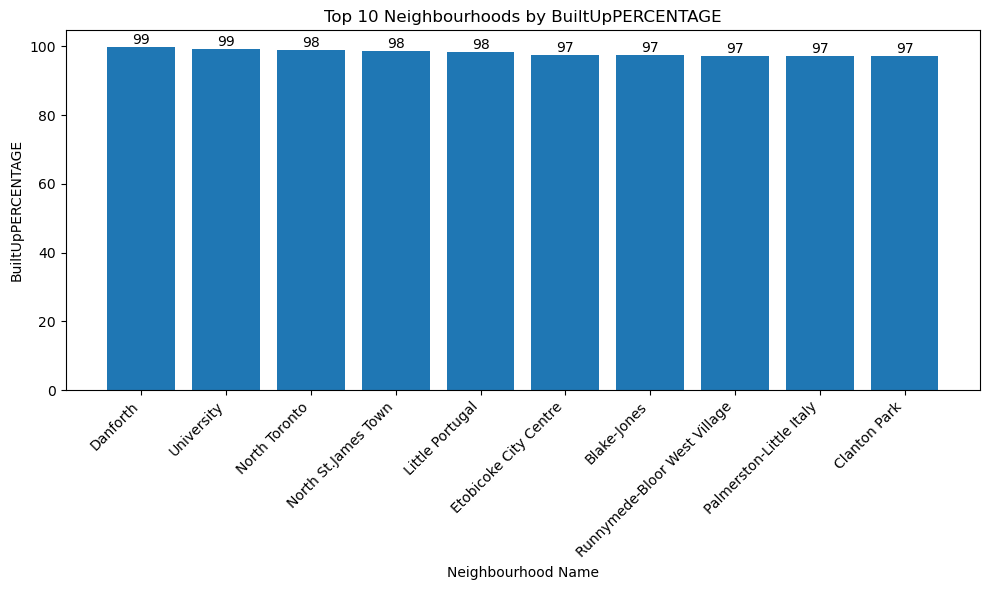

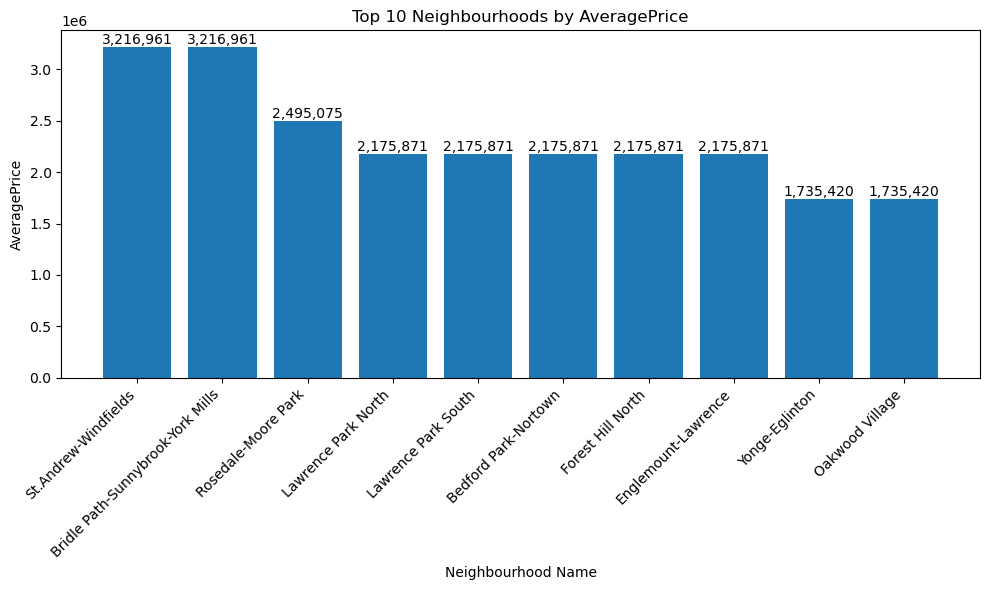

In [141]:
import matplotlib.pyplot as plt

# Columns to plot against NeighbourhoodName
columns_to_plot = ['Poles_Count', 'POI_Count', 'TCamera_Count', 'TotalPopulation', 
                   'MedianTotalIncome', 'AverageTotalIncome', 'BuildingCoveragePERCENTAGE', 
                   'ParksOSNAPERCENTAGE', 'BuiltUpPERCENTAGE', 'AveragePrice']

# Loop through specified columns
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Sort DataFrame by the current column
    sorted_data = Neighbourhood_data.sort_values(by=column, ascending=False)
    
    # Select top 10 neighbourhoods
    top_10 = sorted_data.head(10)
    
    bars = plt.bar(top_10['NeighbourhoodName'], top_10[column])
    plt.title('Top 10 Neighbourhoods by ' + column)
    plt.xlabel('Neighbourhood Name')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')
    
    # Add labels to the bars with commas
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,}'.format(int(height)), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

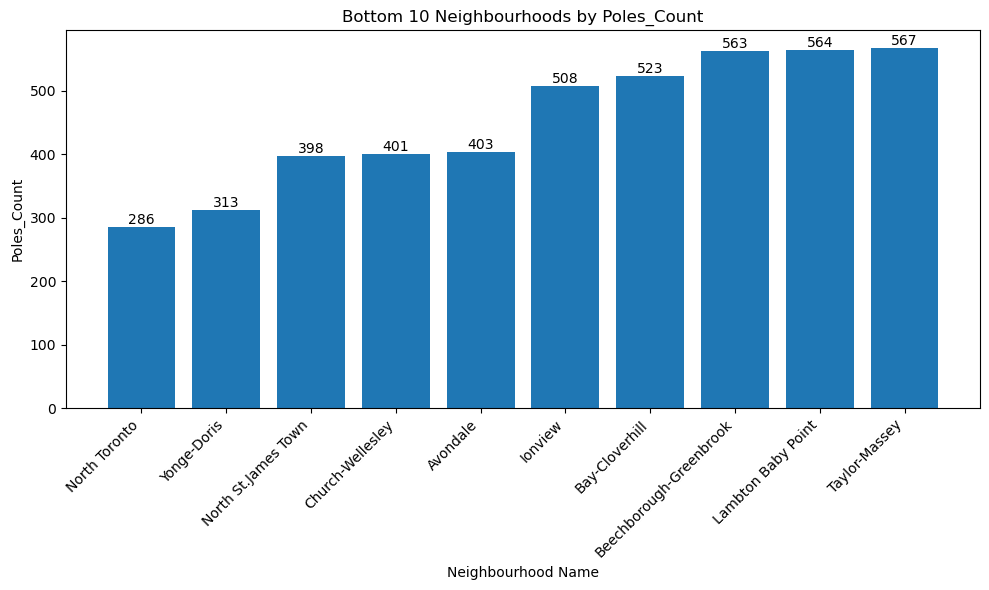

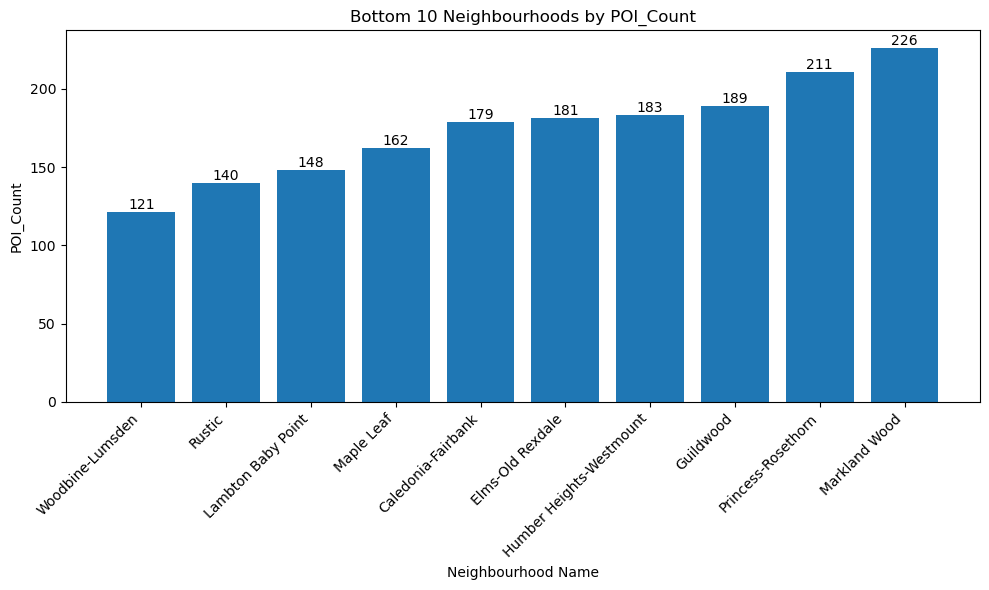

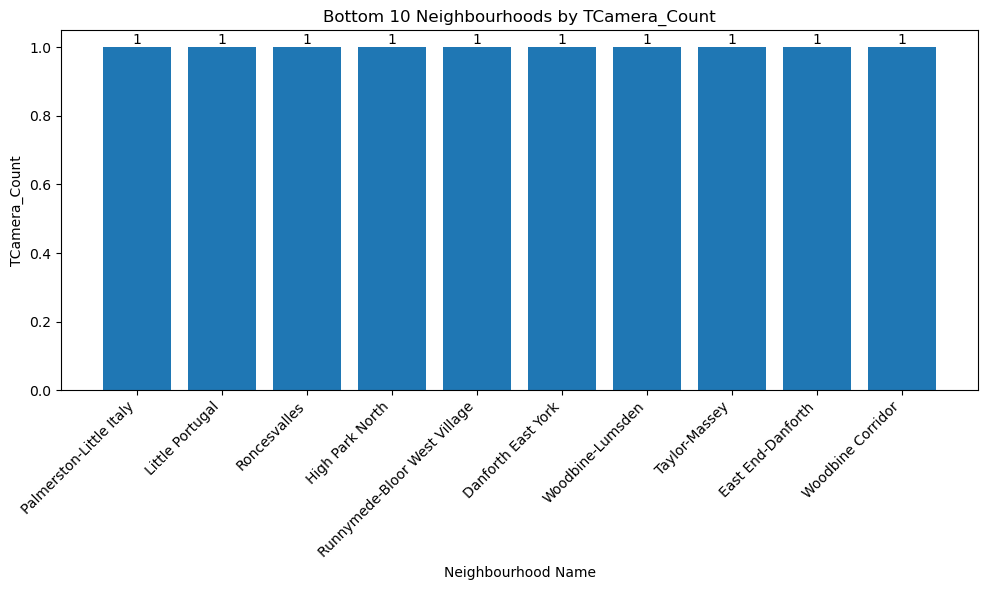

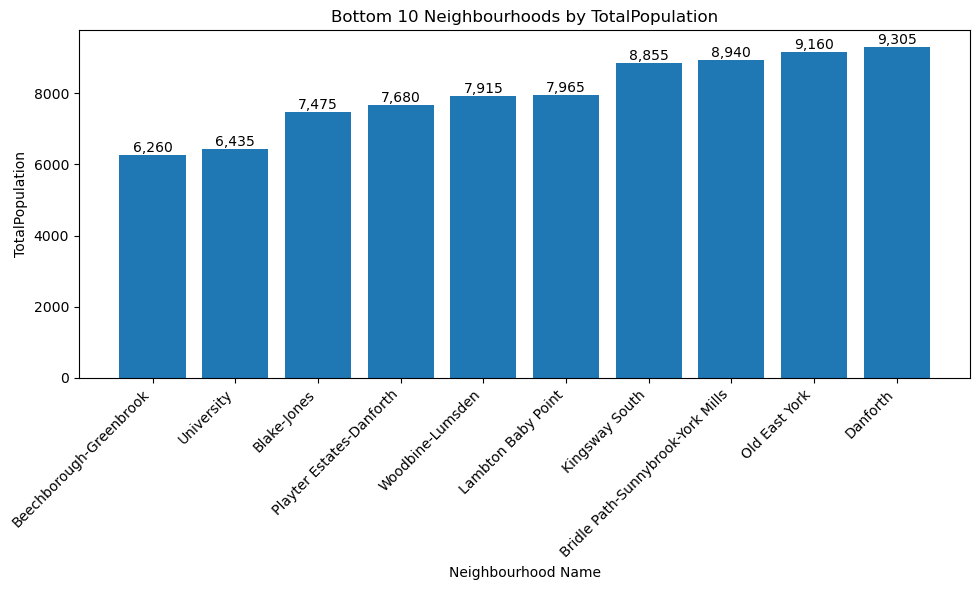

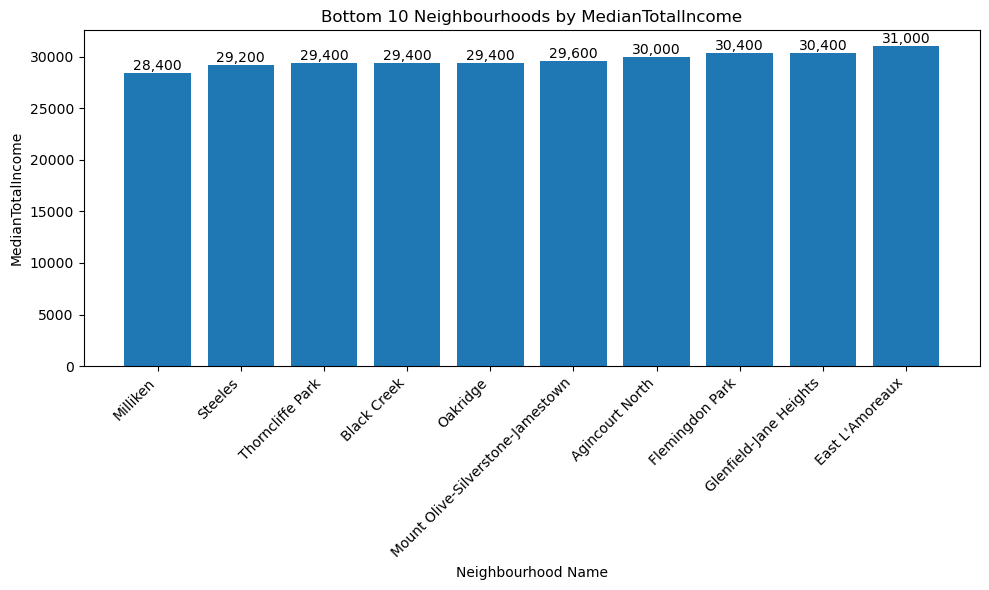

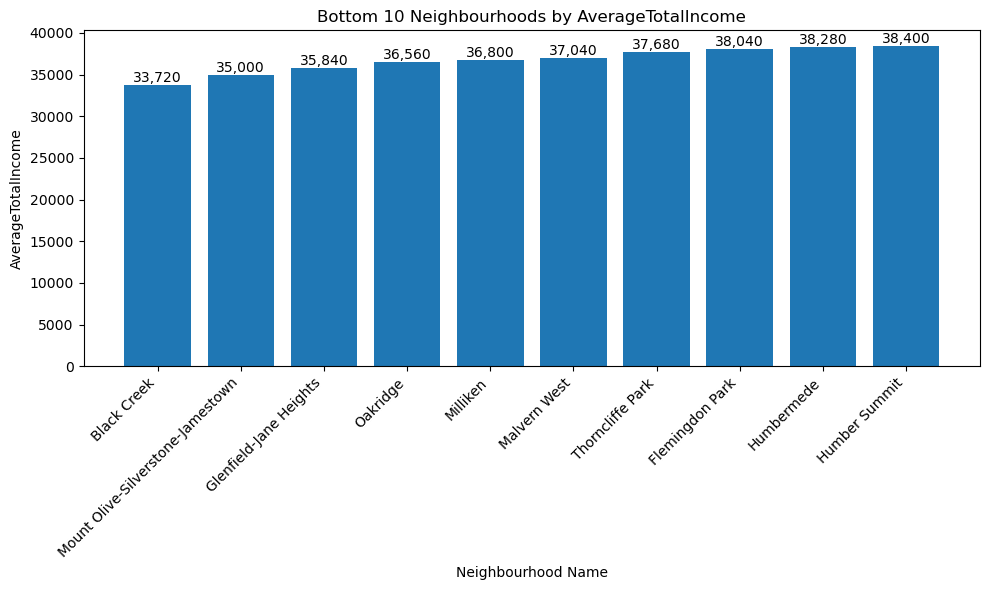

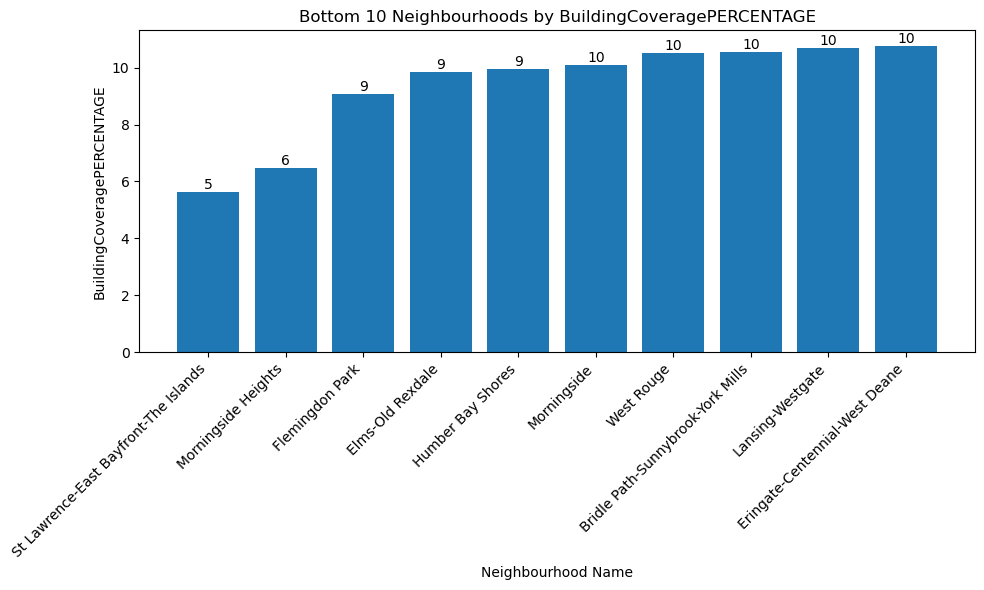

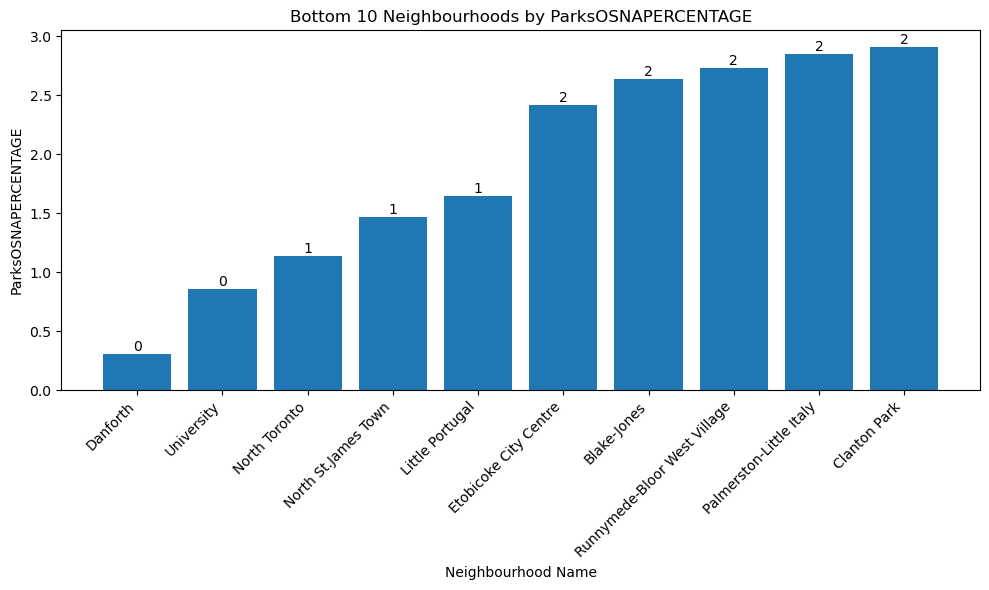

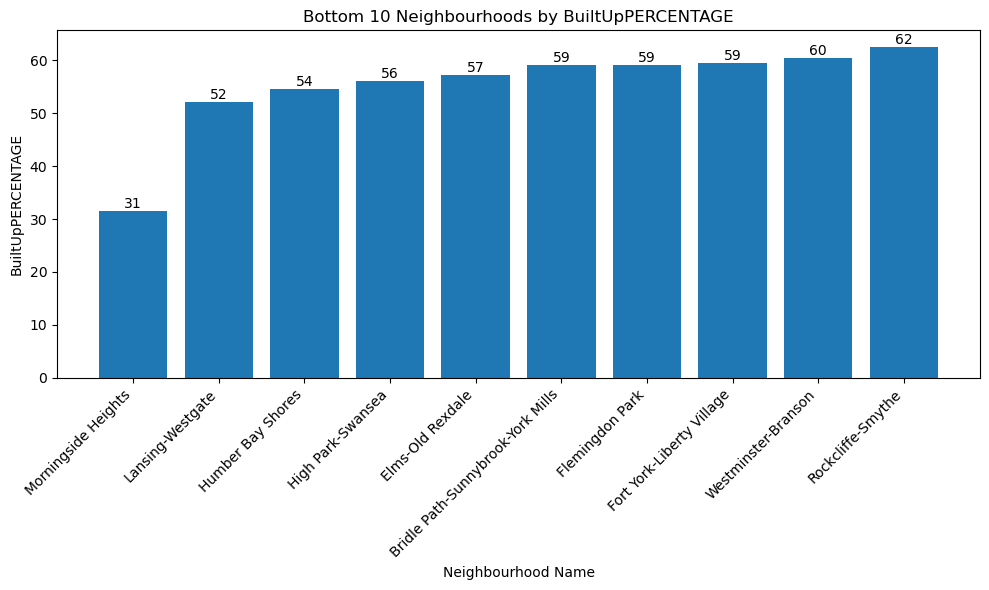

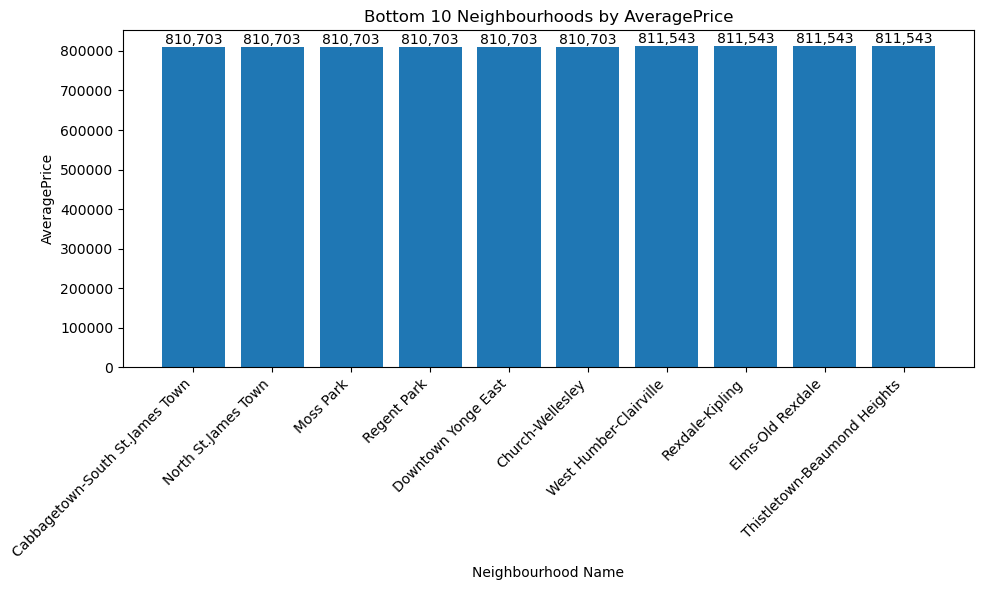

In [148]:
import matplotlib.pyplot as plt

# Columns to plot against NeighbourhoodName
columns_to_plot = ['Poles_Count', 'POI_Count', 'TCamera_Count', 'TotalPopulation', 
                   'MedianTotalIncome', 'AverageTotalIncome', 'BuildingCoveragePERCENTAGE', 
                   'ParksOSNAPERCENTAGE', 'BuiltUpPERCENTAGE', 'AveragePrice']

# Loop through specified columns
for column in columns_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Sort DataFrame by the current column in ascending order
    sorted_data = Neighbourhood_data.sort_values(by=column, ascending=True)
    
    # Select bottom 10 neighbourhoods
    bottom_10 = sorted_data.head(10)
    
    bars = plt.bar(bottom_10['NeighbourhoodName'], bottom_10[column])
    plt.title('Bottom 10 Neighbourhoods by ' + column)
    plt.xlabel('Neighbourhood Name')
    plt.ylabel(column)
    plt.xticks(rotation=45, ha='right')
    
    # Add labels to the bars with commas
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, '{:,}'.format(int(height)), ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()

# Check neighbourhood data for correlation

In [53]:
#Install and import neccessary libraries
import os
import numpy as np
import geopandas as gpd
import pandas as pd



# Load and read the MCI file
MCI_file = os.path.join(folder_path, "MCI_Cleaned.csv") # Update to the actual file location
MCI_data = pd.read_csv(MCI_file)
 
MCI_data #display dataframe

,OCC_YEAR,OCC_MONTH,SEASON,OCC_DAY,OCC_DOY,OCC_DOW,DOW_WorkvsEnd,OCC_HOUR,TIMECategory,LOCATION_TYPE,PREMISES_TYPE,OFFENCE,MCI_CATEGORY,NEIGHBOURHOOD_158,LONG_WGS84,LAT_WGS84,DATE_TIME_LINK,TEMP,TEMPCategory
0,2023,January,Winter,1,1,Sunday,Weekend,2,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery With Weapon,Robbery,Corso Italia-Davenport,-79.450529,43.676205,2023/1/1 2,4.7,Mild
1,2023,January,Winter,1,1,Sunday,Weekend,1,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Robbery - Other,Robbery,St Lawrence-East Bayfront-The Islands,-79.368457,43.648776,2023/1/1 1,4.5,Mild
2,2023,January,Winter,1,1,Sunday,Weekend,9,Morning,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Morningside Heights,-79.202638,43.815274,2023/1/1 9,4.4,Mild
3,2023,January,Winter,1,1,Sunday,Weekend,3,Night,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Assault With Weapon,Assault,New Toronto,-79.517052,43.600915,2023/1/1 3,4.9,Mild
4,2023,January,Winter,1,1,Sunday,Weekend,21,Evening,"Streets, Roads, Highways (Bicycle Path, Privat...",Outside,Theft Of Motor Vehicle,Auto Theft,Victoria Village,-79.300571,43.719703,2023/1/1 21,4.1,Mild
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
365681,2014,December,Winter,31,365,Wednesday,Weekday,16,Afternoon,"Apartment (Rooming House, Condo)",Apartment,B&E,Break and Enter,Wellington Place,-79.390275,43.647849,2014/12/31 16,-6.3,Chilly
365682,2014,December,Winter,31,365,Wednesday,Weekday,12,Afternoon,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault With Weapon,Assault,Bendale-Glen Andrew,-79.248690,43.761776,2014/12/31 12,-6.3,Chilly
365683,2014,December,Winter,31,365,Wednesday,Weekday,12,Afternoon,"Single Home, House (Attach Garage, Cottage, Mo...",House,Assault,Assault,Bendale-Glen Andrew,-79.248690,43.761776,2014/12/31 12,-6.3,Chilly
365684,2014,December,Winter,31,365,Wednesday,Weekday,22,Evening,"Apartment (Rooming House, Condo)",Apartment,Assault,Assault,Greenwood-Coxwell,-79.325929,43.671381,2014/12/31 22,-5.7,Chilly


In [54]:
# Find the count of offenses by neighborhood to aggregate data to Neighbourhood level
neighbourhood_counts = MCI_data['NEIGHBOURHOOD_158'].value_counts().reset_index()
neighbourhood_counts.columns = ['NeighbourhoodName', 'Crime_Count']  # Rename columns

neighbourhood_counts

,NeighbourhoodName,Crime_Count
0,West Humber-Clairville,10309
1,Moss Park,8621
2,Downtown Yonge East,7762
3,Yonge-Bay Corridor,7294
4,York University Heights,7237
...,...,...
154,Maple Leaf,734
155,Guildwood,680
156,Woodbine-Lumsden,649
157,Lambton Baby Point,585


In [55]:
# Load and read the Neighbourhood file
neighbourhood_file = os.path.join(folder_path, "Neighbourhood_Cleaned.csv")
neighbourhood_data = pd.read_csv(neighbourhood_file)

In [56]:
# Join the aggregated crime counts with neighborhood data based on the common neighborhood field
neighbourhood_merged = pd.merge(neighbourhood_data, neighbourhood_counts, on='NeighbourhoodName', how='left')

# Drop rows with missing values (if any)
neighbourhood_merged = neighbourhood_merged.dropna(subset=['Crime_Count'])

In [57]:
# Check Neighbourhood File
# Load the Neighbourhood file
Neighbourhood_file = os.path.join(folder_path, "Neighbourhood_Cleaned.csv")
Neighbourhood_data = pd.read_csv(Neighbourhood_file)

# Drop the 'geometry' column
if 'geometry' in Neighbourhood_data.columns:
    Neighbourhood_data.drop(columns=['geometry'], inplace=True)
else:
    print("Column 'geometry' not found in the DataFrame.")

Neighbourhood_data

Column 'geometry' not found in the DataFrame.


,NeighbourhoodName,Poles_Count,POI_Count,TCamera_Count,TotalPopulation,MedianTotalIncome,AverageTotalIncome,BuildingCoveragePERCENTAGE,ParksOSNAPERCENTAGE,BuiltUpPERCENTAGE,AveragePrice
0,South Eglinton-Davisville,649,1185,2,22735,52400,69000,29.087555,6.375824,93.624176,1035636
1,North Toronto,286,851,2,15885,46000,58100,31.403497,1.133288,98.866712,1035636
2,Dovercourt Village,1170,534,1,12380,38000,55850,33.231409,7.875048,92.124952,1266076
3,Junction-Wallace Emerson,1663,876,1,23180,41200,54350,33.167140,6.821523,93.178477,1266076
4,Yonge-Bay Corridor,1139,20281,12,12645,44000,68200,48.028587,6.382056,93.617944,880955
...,...,...,...,...,...,...,...,...,...,...,...
153,West Humber-Clairville,7704,4254,2,33300,33600,40560,17.465098,11.373365,88.626635,811543
154,Black Creek,1148,541,1,21145,29400,33720,17.667624,15.911150,84.088850,836734
155,Pelmo Park-Humberlea,1223,369,1,11290,39600,49000,14.734703,17.357255,82.642745,836734
156,Humbermede,1031,707,1,16955,32400,38280,17.920562,21.469614,78.530386,836734


In [64]:

min_med_income = Neighbourhood_data['MedianTotalIncome'].min()
max_med_income = Neighbourhood_data['MedianTotalIncome'].max()

print("Minimum Median Total Income:", min_med_income)
print("Maximum Median Total Income:", max_med_income)


Minimum Median Total Income: 28400
Maximum Median Total Income: 74500


In [65]:

min_t_income = Neighbourhood_data['AverageTotalIncome'].min()
max_t_income = Neighbourhood_data['AverageTotalIncome'].max()

print("Minimum Average Total Income:", min_t_income)
print("Maximum Average Total Income:", max_t_income)


Minimum Average Total Income: 33720
Maximum Average Total Income: 237600


In [66]:

min_house = Neighbourhood_data['AveragePrice'].min()
max_house = Neighbourhood_data['AveragePrice'].max()

print("Minimum Average House Price:", min_house)
print("Maximum Average House Price:", max_house)


Minimum Average House Price: 810703
Maximum Average House Price: 3216961


In [68]:
# Min-Max normalization function
def min_max_normalize(value, min_val, max_val):
    return (value - min_val) / (max_val - min_val)

# Normalize Median Total Income
Neighbourhood_data['MedianTotalIncome_normalized'] = Neighbourhood_data['MedianTotalIncome'].apply(lambda x: min_max_normalize(x, 28400, 74500))

# Normalize Average Total Income
Neighbourhood_data['AverageTotalIncome_normalized'] = Neighbourhood_data['AverageTotalIncome'].apply(lambda x: min_max_normalize(x, 33720, 237600))

# Normalize Average House Price
Neighbourhood_data['AverageHousePrice_normalized'] = Neighbourhood_data['AveragePrice'].apply(lambda x: min_max_normalize(x, 810703, 3216961))


In [69]:
Neighbourhood_data

,NeighbourhoodName,Poles_Count,POI_Count,TCamera_Count,TotalPopulation,MedianTotalIncome,AverageTotalIncome,BuildingCoveragePERCENTAGE,ParksOSNAPERCENTAGE,BuiltUpPERCENTAGE,AveragePrice,MedianTotalIncome_normalized,AverageTotalIncome_normalized,AverageHousePrice_normalized
0,South Eglinton-Davisville,649,1185,2,22735,52400,69000,29.087555,6.375824,93.624176,1035636,0.520607,0.173043,0.093478
1,North Toronto,286,851,2,15885,46000,58100,31.403497,1.133288,98.866712,1035636,0.381779,0.119580,0.093478
2,Dovercourt Village,1170,534,1,12380,38000,55850,33.231409,7.875048,92.124952,1266076,0.208243,0.108544,0.189245
3,Junction-Wallace Emerson,1663,876,1,23180,41200,54350,33.167140,6.821523,93.178477,1266076,0.277657,0.101187,0.189245
4,Yonge-Bay Corridor,1139,20281,12,12645,44000,68200,48.028587,6.382056,93.617944,880955,0.338395,0.169119,0.029196
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
153,West Humber-Clairville,7704,4254,2,33300,33600,40560,17.465098,11.373365,88.626635,811543,0.112798,0.033549,0.000349
154,Black Creek,1148,541,1,21145,29400,33720,17.667624,15.911150,84.088850,836734,0.021692,0.000000,0.010818
155,Pelmo Park-Humberlea,1223,369,1,11290,39600,49000,14.734703,17.357255,82.642745,836734,0.242950,0.074946,0.010818
156,Humbermede,1031,707,1,16955,32400,38280,17.920562,21.469614,78.530386,836734,0.086768,0.022366,0.010818


In [77]:
# Drop the "NeighbourhoodName" column
data_without_neighbourhood = Neighbourhood_data.drop(columns=['NeighbourhoodName', 'MedianTotalIncome', 'AverageTotalIncome', 'AveragePrice', 'MedianTotalIncome_normalized'])

# Compute correlation matrix
correlation_matrix = data_without_neighbourhood.corr()

# Print correlation matrix
print("Correlation Matrix:")
correlation_matrix


Correlation Matrix:


,Poles_Count,POI_Count,TCamera_Count,TotalPopulation,BuildingCoveragePERCENTAGE,ParksOSNAPERCENTAGE,BuiltUpPERCENTAGE,AverageTotalIncome_normalized,AverageHousePrice_normalized
Poles_Count,1.000000,0.261197,0.210090,0.597214,-0.188160,0.086432,-0.086432,0.008974,0.021783
POI_Count,0.261197,1.000000,0.337862,0.165214,0.391948,-0.154974,0.154974,0.014089,-0.066128
TCamera_Count,0.210090,0.337862,1.000000,0.268323,0.078253,0.127172,-0.127172,0.112972,-0.010547
TotalPopulation,0.597214,0.165214,0.268323,1.000000,-0.127282,0.087420,-0.087420,-0.211257,-0.125979
BuildingCoveragePERCENTAGE,-0.188160,0.391948,0.078253,-0.127282,1.000000,-0.665445,0.665445,0.099609,-0.017387
ParksOSNAPERCENTAGE,0.086432,-0.154974,0.127172,0.087420,-0.665445,1.000000,-1.000000,0.059420,0.009838
BuiltUpPERCENTAGE,-0.086432,0.154974,-0.127172,-0.087420,0.665445,-1.000000,1.000000,-0.059420,-0.009838
AverageTotalIncome_normalized,0.008974,0.014089,0.112972,-0.211257,0.099609,0.059420,-0.059420,1.000000,0.716735
AverageHousePrice_normalized,0.021783,-0.066128,-0.010547,-0.125979,-0.017387,0.009838,-0.009838,0.716735,1.000000


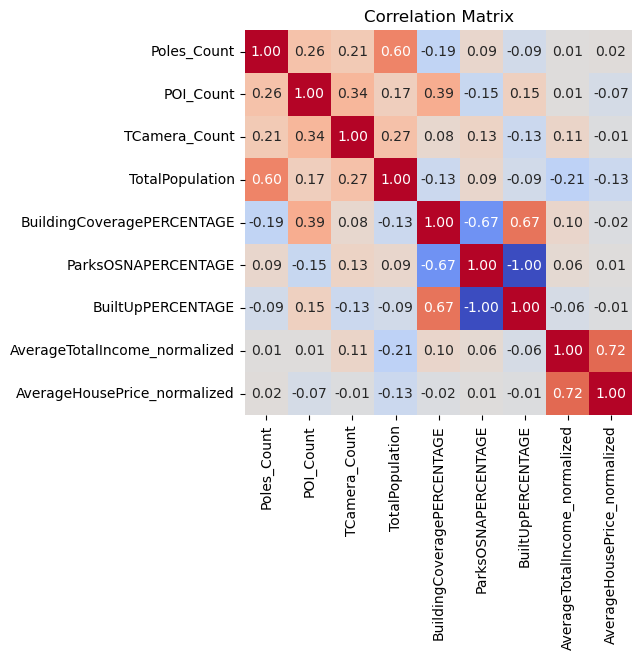

In [81]:
# Plot heatmap of correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",  cbar=False)
plt.title('Correlation Matrix')
plt.show()

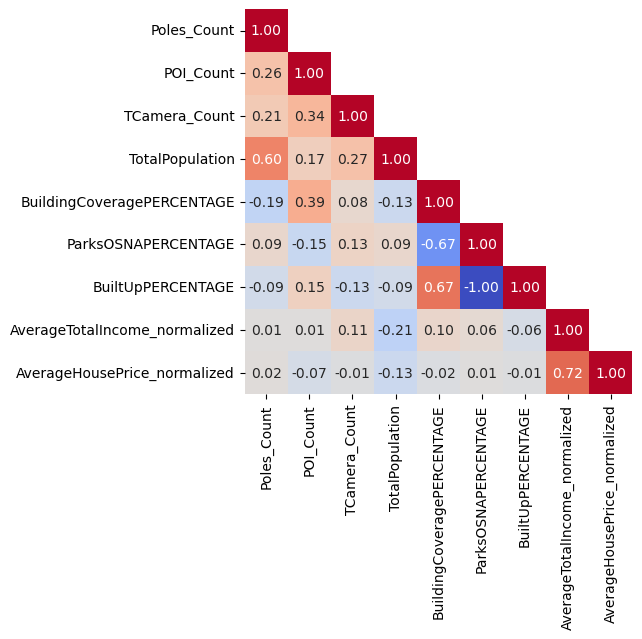

In [89]:
import numpy as np

# Create a mask to hide the upper triangular part of the correlation matrix, excluding the diagonal
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool), k=1)

# Plot heatmap of correlation matrix
plt.figure(figsize=(5, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", mask=mask, cbar=False)
plt.title('')
plt.show()


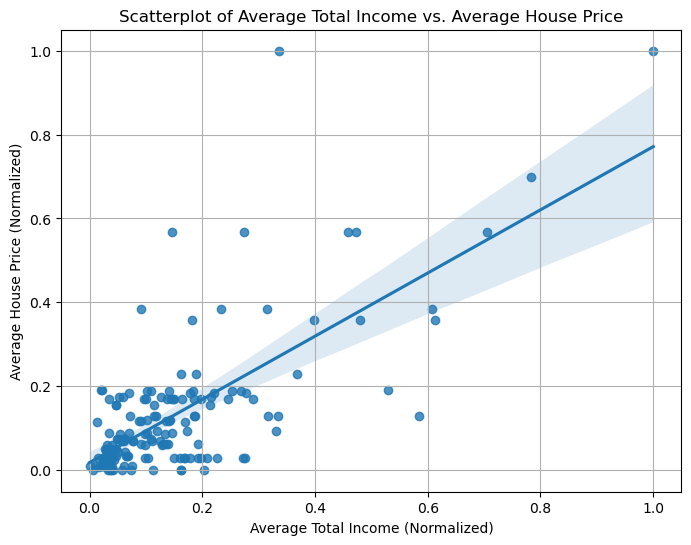

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatterplot with regression line
plt.figure(figsize=(8, 6))
sns.regplot(x='AverageTotalIncome_normalized', y='AverageHousePrice_normalized', data=Neighbourhood_data)
plt.title('Scatterplot of Average Total Income vs. Average House Price')
plt.xlabel('Average Total Income (Normalized)')
plt.ylabel('Average House Price (Normalized)')
plt.grid(True)
plt.show()